## Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [2]:
def read_covid_dataset(path_to_csv):
    X = pd.read_csv(path_to_csv)
    X['date'] = pd.to_datetime(X['date'], infer_datetime_format=True)
    y = None
    return X, y


def read_hr_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    df.set_index('enrollee_id', inplace=True)
    X = df.drop(columns=['target'])
    y = df['target']
    return X, y

In [3]:
COVID_DATA_PATH = 'hw1_data/covid.csv'
HR_DATA_PATH = 'hw1_data/hr.csv' 

In [4]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

In [5]:
X_hr.dtypes  # типы признаков

city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

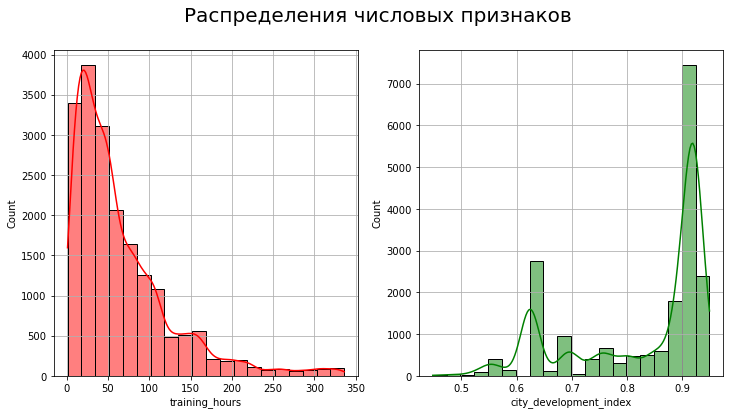

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(x='training_hours', data=X_hr, ax=axs[0], bins=20, kde=True, color='red')
sns.histplot(x='city_development_index', data=X_hr, ax=axs[1], bins=20, kde=True, color='green')

for ax in axs:
    ax.grid()
    
fig.suptitle('Распределения числовых признаков', fontsize=20);

In [7]:
categ_features = [fname for fname, ftype in dict(X_hr.dtypes).items() if ftype == 'object']
len(categ_features)

10

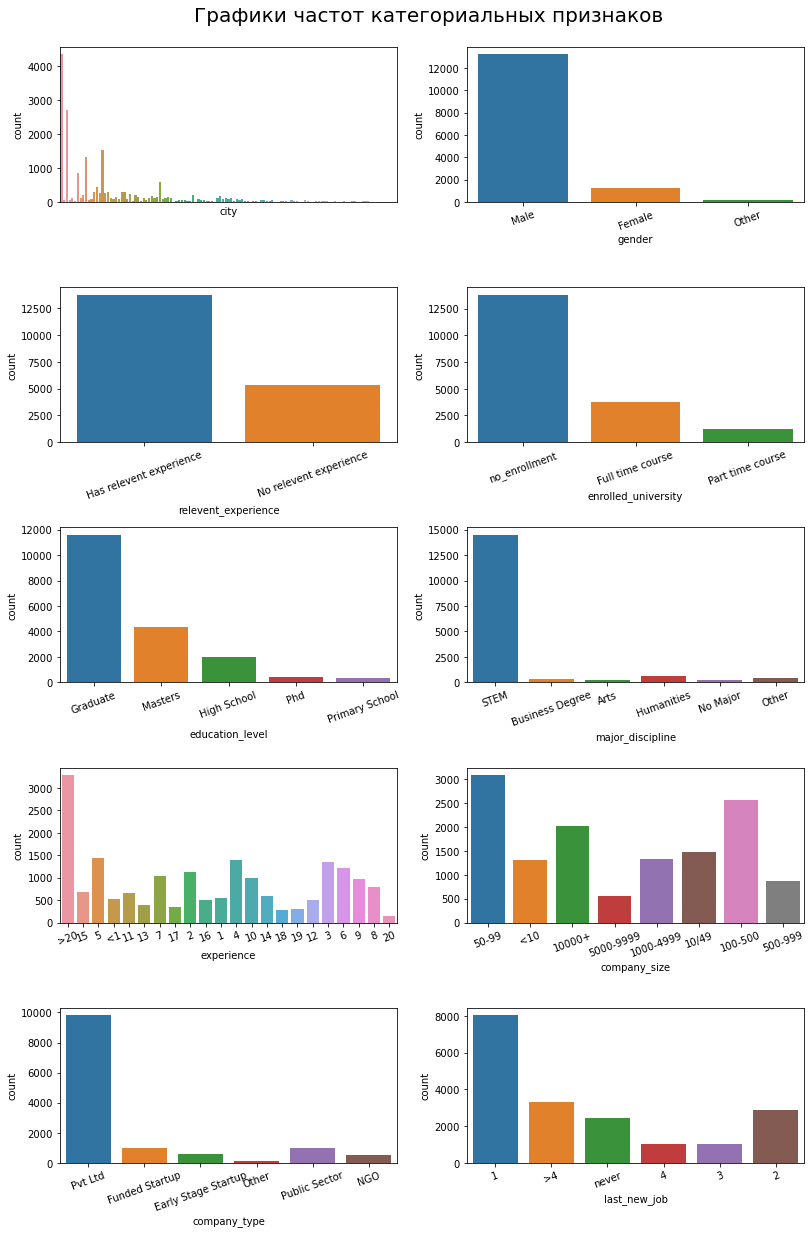

In [8]:
fig, axes = plt.subplots(5, 2, figsize=(12, 18))

for i, fname in enumerate(categ_features):
    sns.countplot(x=fname, data=X_hr, ax=axes[i // 2][i % 2])

for i in range(5):
    for ax in axes[i]:
        for tick in ax.get_xticklabels():
            tick.set_rotation(20)

axes[0][0].set_xticks([]);

fig.suptitle('Графики частот категориальных признаков', fontsize=20);
fig.tight_layout(rect=[0, 0.03, 0.95, 0.98])

#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [9]:
print(f'Исходный размер датасета hr {X_hr.shape[0]}')

Исходный размер датасета hr 19158


In [10]:
X_hr_dropna = X_hr.dropna(axis=0, how='any')

In [11]:
print(f'Pазмер датасета covid без NaN {X_hr_dropna.shape[0]}')
print(f'Датасет уменьшился на {X_hr.shape[0] - X_hr_dropna.shape[0]} записей.')

Pазмер датасета covid без NaN 8955
Датасет уменьшился на 10203 записей.


Изменения в распределениях признаков:

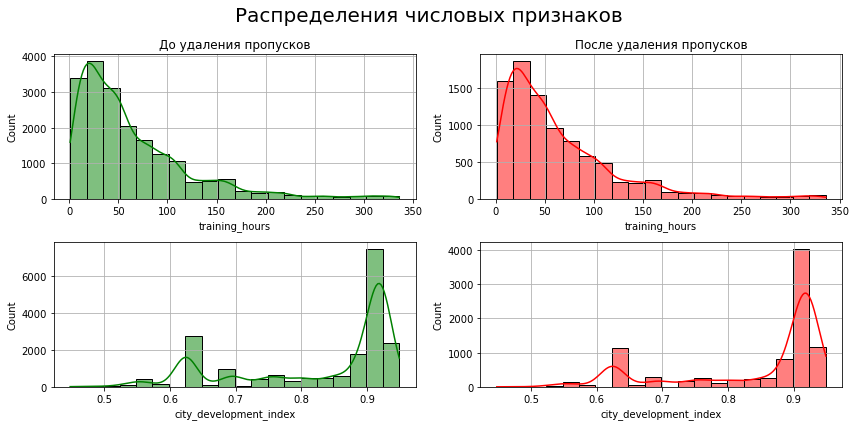

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

sns.histplot(x='training_hours', data=X_hr, ax=axs[0][0], bins=20, kde=True, color='green')
sns.histplot(x='training_hours', data=X_hr_dropna, ax=axs[0][1], bins=20, kde=True, color='red')

sns.histplot(x='city_development_index', data=X_hr, ax=axs[1][0], bins=20, kde=True, color='green')
sns.histplot(x='city_development_index', data=X_hr_dropna, ax=axs[1][1], bins=20, kde=True, color='red')

axs[0][0].set_title('До удаления пропусков')
axs[0][1].set_title('После удаления пропусков')

for ax in axs:
    for a in ax:
        a.grid()
    
fig.suptitle('Распределения числовых признаков', fontsize=20);
fig.tight_layout()

In [13]:
X_hr_dropna['city'].describe()

count         8955
unique         116
top       city_103
freq          2426
Name: city, dtype: object

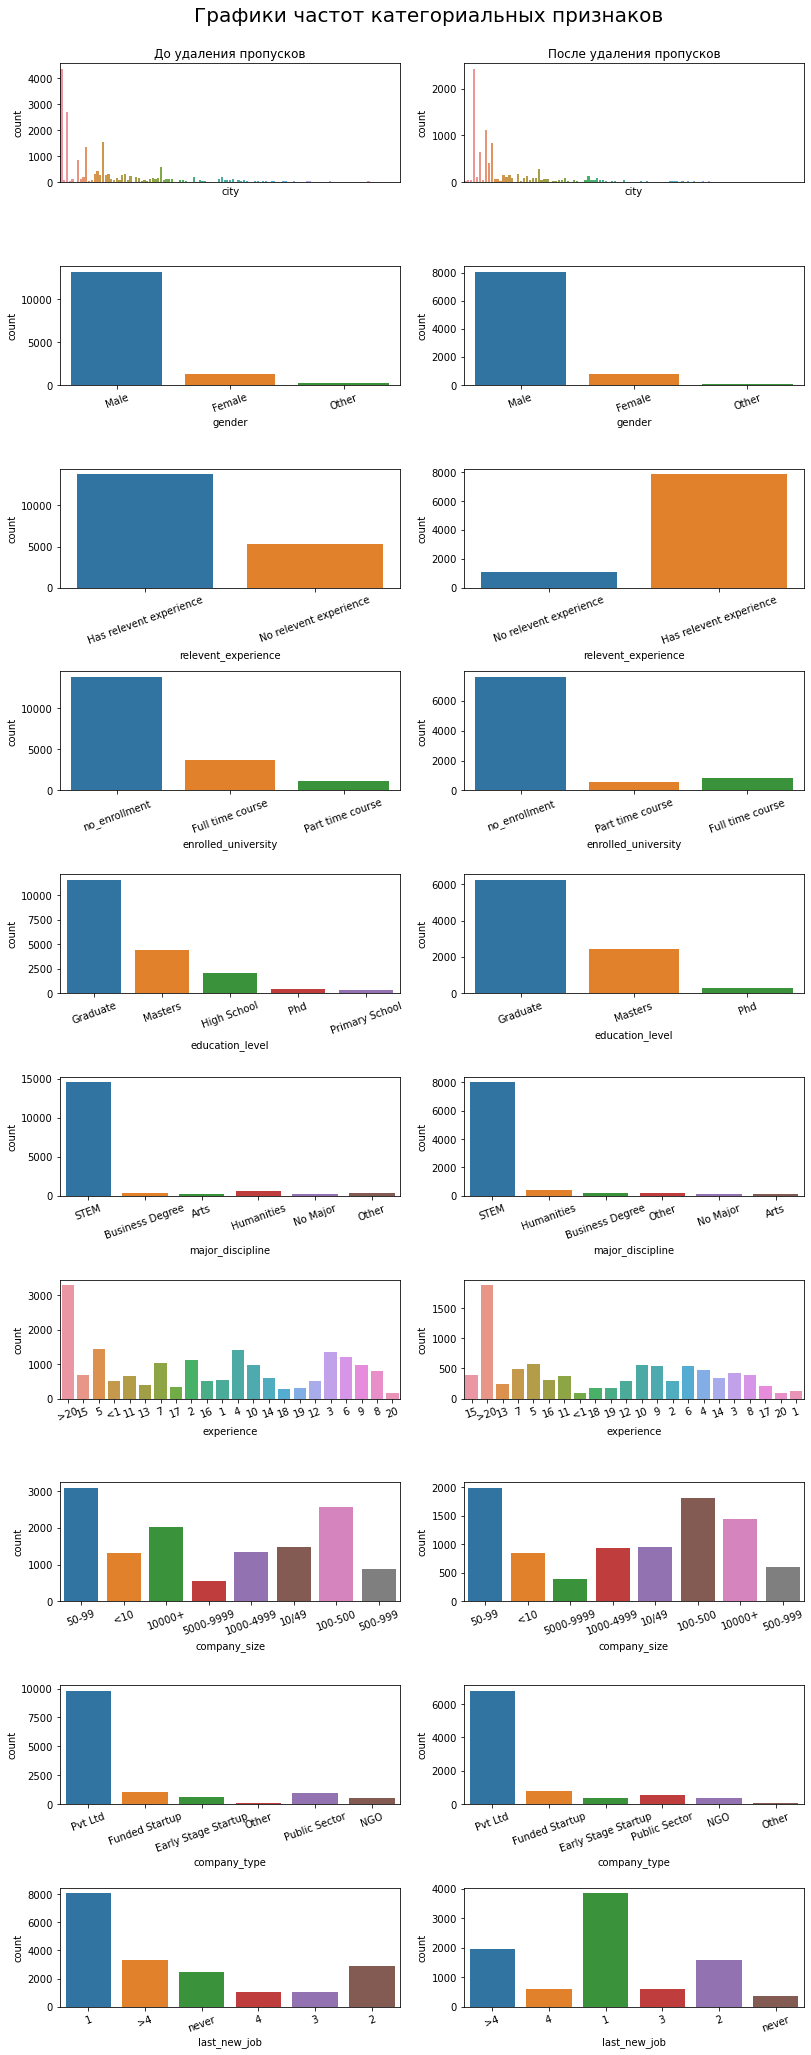

In [14]:
fig, axs = plt.subplots(len(categ_features), 2, figsize=(12, 30))

for i, fname in enumerate(categ_features):
    sns.countplot(x=fname, data=X_hr, ax=axs[i][0])
    sns.countplot(x=fname, data=X_hr_dropna, ax=axs[i][1])

axs[0][0].set_xticks([]);
axs[0][1].set_xticks([]);

axs[0][0].set_title('До удаления пропусков')
axs[0][1].set_title('После удаления пропусков')

for i in range(len(categ_features)):
    for ax in axs[i]:
        for tick in ax.get_xticklabels():
            tick.set_rotation(20);
            
fig.suptitle('Графики частот категориальных признаков', fontsize=20);
fig.tight_layout(rect=[0, 0.03, 0.95, 0.98]);

In [15]:
for fname in categ_features:
    print(fname)

city
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job


**Ответ**

Распределения количественных признаках сохранилось примерно таким же.

Заметные изменения в категориальных признаках:
1. В 'relevant_experience' повысилась доля людей с релевантным опытом.
2. В 'enrolled university' повысилась доля людей, не обучающихся в университете.
3. В 'education_level' пропали категории 'High School' и 'Primary School' (т.к. для них не актуальна графа 'major_discipline', и у всех объектов данных категорий в этой графе пропуски).
4. В 'last_new_job' уменьшилась доля людей, никогда прежде не работавших.

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

In [16]:
X_hr.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
dtype: int64

In [17]:
# в числовых признаках нет пропусков, но, возможно, есть специальные значения? 
# upd. вроде нет
display(X_hr['city_development_index'].value_counts())
display(X_hr['training_hours'].value_counts())  

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
272      5
234      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

* __'gender'__ можно заполнить модой, т.к. мужчин в датасете значительно больше, и случайно взятий человек с большой долей вероятности окажется мужчиной.

* __'enrolled_university'__ - аналогично, модой. 
* __'education_level'__ - мода встречается не так часто, а т.к. пропусков немного, то надёжнее удалить строки с ними.

* __'major_discipline'__ - для школьников (High и Primary School) введём новую категорию 'unappropriate', остальные пропуски заполним модой по вышеизложенным соображениям.

* __'experience'__ - строк с пропуском мало, поэтому удалить.

* __'company_size'__ - нет какого-то преобладающего значения, поэтому применить label_encoding и забить медианой.

* __'company_type'__ - модой, ибо 'Pvt Ltd' встречается достаточно часто.

* __'last_new_job'__ - аналогично 'company_size' и медианой.

In [18]:
def fill_na(X, y):
    tmp = X.copy()
    
    # приписываем школьникам особую категорию в графе 'major_discipline'
    tmp.loc[(tmp.education_level == 'High School') | (tmp.education_level == 'Primary School'),
       'major_discipline'] = 'unappropriate'
    
    
    # кодирование ранговых признаков
    lnj_encode = { 'never': 0, '1': 1, '2': 2, '3': 3, '4': 4, '>4': 5, np.NaN: np.NaN }
    tmp['lnj_code'] = tmp['last_new_job'].apply(lambda x: lnj_encode[x])
    
    def encode_exp(x):
        if pd.isnull(x):
            return np.NaN
        elif x.isdigit():
            return int(x)
        else:
            return 0 if x == '<1' else 21  
    tmp['exp_code'] = tmp['experience'].apply(encode_exp)
    
    def encode_cs(x):
        if pd.isna(x):
            return np.NaN
        elif x == '<10':
            return 9
        elif x == '10000+':
            return 10001
        elif x == '10/49':
            return 10
        else:
            return int(x.split('-')[0])
    tmp['cs_code'] = tmp['company_size'].apply(encode_cs)
    
    # заполнение пропусков
    fill_values = {
        'gender': tmp.gender.mode().item(),
        'enrolled_university': tmp.enrolled_university.mode().item(),
        'company_type': tmp.company_type.mode().item(),
        'major_discipline': tmp.major_discipline.mode().item(),
        'lnj_code': tmp.lnj_code.median(),
        'exp_code': tmp.exp_code.median(),
        'cs_code': tmp.cs_code.median()
    }
    print('Заполнение пропусков:')
    tmp.fillna(value=fill_values, inplace=True)
    for k, v in fill_values.items():
        print(k, v)
    
    # "раскодирование назад"
    lnj_decode = {v: k for k, v in lnj_encode.items()}
    tmp['last_new_job'] = tmp['lnj_code'].apply(lambda x: lnj_decode[x])
    
    def decode_exp(x):
        if 0 < x < 21:
            return str(int(x))
        elif x == 0:
            return '<1'
        else:
            return '>20'
    tmp['experience'] = tmp['exp_code'].apply(decode_exp)
    
    
    cs_decode = {50: '50-99', 9: '<10', 10001: '10000+', 5000: '5000-9999', 1000: '1000-4999', 10: '10-49',
                100: '100-500', 500: '500-999'}
    tmp['company_size'] = tmp['cs_code'].apply(lambda x: cs_decode[x])
    
    # пришить к датафрейму вектор целевой переменной и удалить строки, где остались пропуски
    # (в столбцах education_level и experience)
    tmp.drop(columns=['exp_code', 'lnj_code', 'cs_code'], inplace=True)
    tmp['target'] = y
    tmp.dropna(how='any', inplace=True)
    
    X_fill = tmp.drop(columns=['target'])
    y_fill = tmp['target']
    
    return X_fill, y_fill

In [19]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

Заполнение пропусков:
gender Male
enrolled_university no_enrollment
company_type Pvt Ltd
major_discipline STEM
lnj_code 1.0
exp_code 9.0
cs_code 100.0


In [20]:
print(f'Датасет уменьшился на {round((1 - X_hr_fill.shape[0] / X_hr.shape[0]) * 100, 3)}%')

Датасет уменьшился на 2.401%


#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

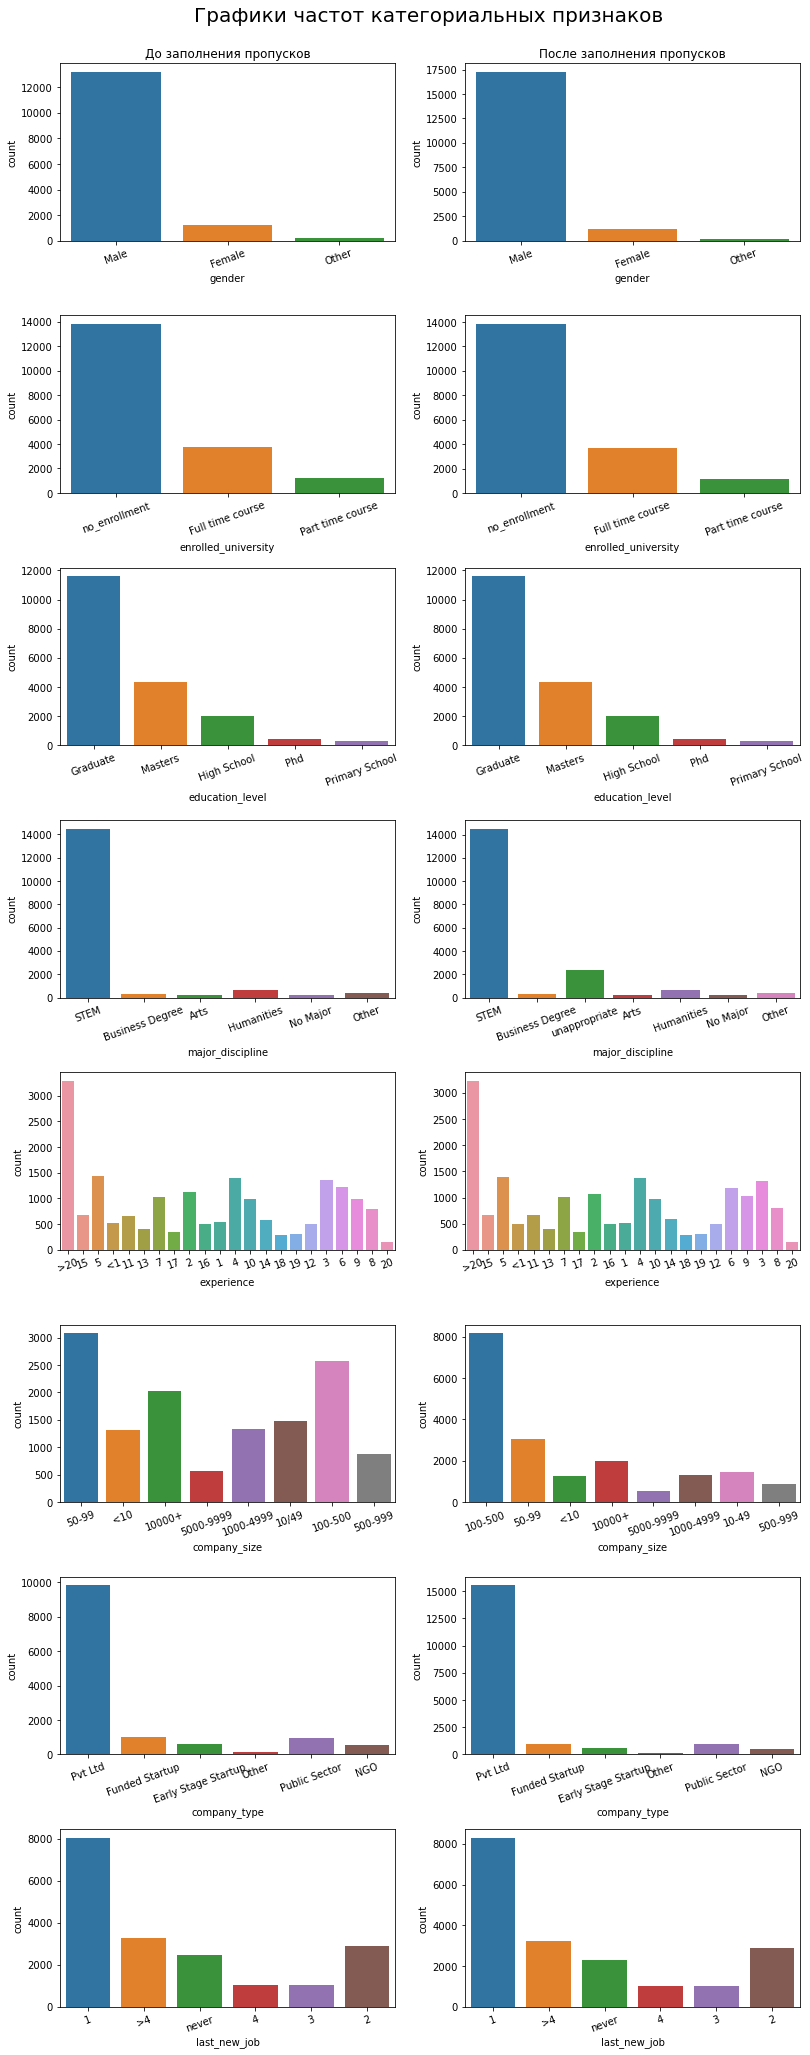

In [21]:
na_features = [fname for fname in categ_features if X_hr[fname].isna().sum() > 0]

fig, axs = plt.subplots(len(na_features), 2, figsize=(12, 30))

for i, fname in enumerate(na_features):
    
    sns.countplot(x=fname, data=X_hr, ax=axs[i][0])
    sns.countplot(x=fname, data=X_hr_fill, ax=axs[i][1])

axs[0][0].set_title('До заполнения пропусков')
axs[0][1].set_title('После заполнения пропусков')

for i in range(len(na_features)):
    for ax in axs[i]:
        for tick in ax.get_xticklabels():
            tick.set_rotation(20);
            
fig.suptitle('Графики частот категориальных признаков', fontsize=20);
fig.tight_layout(rect=[0, 0.03, 0.95, 0.98]);

_Ваш ответ_

Для числовых признаков ничего не поменялось (не было пропусков).

В категориальных признаках:
* __major_discipline__ - добавилась одна категория
* __company_size__ - пик частоты сменился на '100-500'
* у признаков, в которых пропуски заполнялись модой, усилился перекос в сторону этой моды

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [22]:
X_covid.isna().sum()

country                                   0
iso_code                                229
date                                      0
total_vaccinations                      843
people_vaccinated                      1115
people_fully_vaccinated                1662
daily_vaccinations_raw                 1130
daily_vaccinations                       97
total_vaccinations_per_hundred          843
people_vaccinated_per_hundred          1115
people_fully_vaccinated_per_hundred    1662
daily_vaccinations_per_million           97
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Bahrain


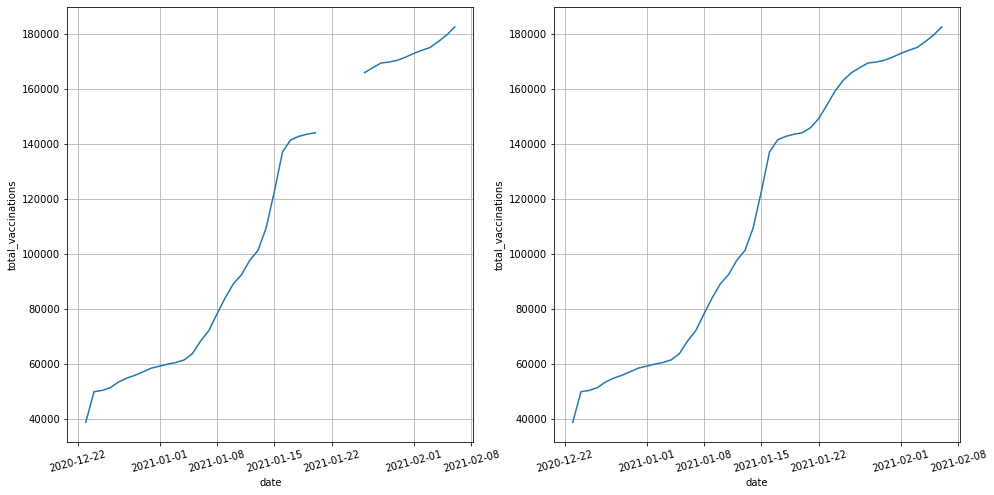

In [23]:
# YOUR_CODE

# 1
cntry = X_covid.groupby('country').count().query('date == 46').index[0]
print(cntry)

# 2
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.lineplot(x='date', y='total_vaccinations', data=X_covid.query('country == @cntry'), ax=axs[0]);

# 3 
def covid_tv_fillna(X):
    tmp = X.copy()
    tmp.total_vaccinations.interpolate(method='spline', order=2, inplace=True)
    return tmp

X_covid_fillna = covid_tv_fillna(X_covid)
sns.lineplot(x='date', y='total_vaccinations', data=X_covid_fillna.query('country == @cntry'), ax=axs[1]);
for ax in axs:
    ax.grid()
    for tick in ax.get_xticklabels():
        tick.set_rotation(15)

_Ваш ответ_

Во временных рядах с очевидным трендом можно восполнить пропуски интерполяцией. Поскольку характер роста нелинейный, используется второй порядок. 

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


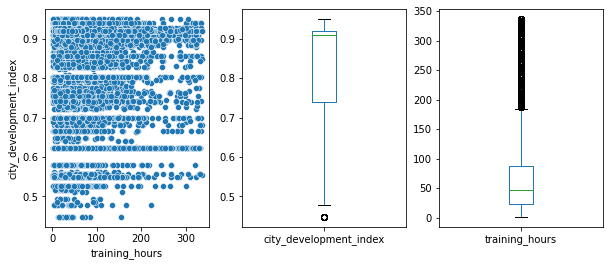

In [24]:
# YOUR_CODE
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

sns.scatterplot(x='training_hours', y='city_development_index', data=X_hr_fill, ax=axs[0])
X_hr_fill.city_development_index.plot(kind='box', ax=axs[1]);
X_hr_fill.training_hours.plot(kind='box', ax=axs[2]);

_Ваш ответ_

Похоже, что выбросов нет.

Некоторые объекты располагаются за пределами усов, но это впринципе не противоречит смыслу признаков и форме распределения (в случае с 'training_hours').

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [25]:
def encode(X):
    tmp = X.copy()
    categ_features = [fname for fname, ftype in dict(tmp.dtypes).items() if ftype == 'object']
    
    # label_encoding
    experience_code = {'<1': 0, '>20': 21}
    experience_code.update({str(i): i for i in range(1, 21)})
    company_size_code = {'<10': 0, '10-49': 1, '50-99': 2, '100-500': 3, '500-999': 4, '1000-4999': 5,
                        '5000-9999': 6, '10000+': 7}
    last_new_job_code = { 'never': 0, '1': 1, '2': 2, '3': 3, '4': 4, '>4': 5}
    education_level_code = {'Primary School': 0, 'High School': 1, 'Graduate': 2, 'Masters': 3, 'Phd': 4}
    
    label_encoding = {
        'experience': experience_code,
        'company_size': company_size_code,
        'last_new_job': last_new_job_code,
        'education_level': education_level_code
    }
    for name, code in label_encoding.items():
        tmp[name + '_index'] = tmp[name].apply(lambda x: code[x])
    
    # one-hot encoding
    tmp = pd.get_dummies(tmp, columns=['gender', 'relevent_experience', 
                                       'major_discipline', 'enrolled_university', 'company_type'])
    
    # freq. encoding
    city_freq = tmp.city.value_counts() / tmp.city.value_counts().sum()
    tmp['city_freq'] = tmp['city'].apply(lambda x: city_freq[x])

    X_encode = tmp.drop(columns=['city'] + list(label_encoding.keys()))
    return X_encode

_Ваш ответ_

1. __city__ - признак не порядковый, поэтому не подходит label encoding. Он имеет {{X_hr.city.value_counts().size}} категорий, поэтому использовать one_hot_encoding представляется неестественным. Остаётся frequency_encoding, который к тому же позволит отразить потенциально полезную информацию, что одни города встречаются чаще, чем другие.
2. __gender__, __relevant_experience__, __major_discipline__, __enrolled_university__, __company_type__ - one-hot encoding, т.к. мало категорий.
6. __experience__, __company_size__, __last_new_job__, __education_level__ - label encoding, т.к. эти признаки можно упорядочить.

In [26]:
X_hr_encode = encode(X_hr_fill)
X_hr_encode.head(3)

,city_development_index,training_hours,experience_index,company_size_index,last_new_job_index,education_level_index,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,...,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,city_freq
enrollee_id,,,,,,,,,,,,,,,,,,,,,
8949,0.920,36,21,3,1,2,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0.228901
29725,0.776,47,15,2,5,2,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0.003530
11561,0.624,83,5,3,0,2,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0.140924


### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

#### 2. (1 балл)
Реализуйте функцию oversampling

In [30]:
def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    
    tmp = X.copy()
    tmp['target'] = y.copy()
    
    tmp0 = tmp.query('target == 0')
    tmp1 = tmp.query('target == 1')
    
    n0, n1 = tmp0.shape[0], tmp1.shape[0]
    
    if n1 < n0:
        tmp0 = tmp0.iloc[:n1, :]
    elif n0 < n1:
        tmp1 = tmp1.iloc[:n0, :]
    tmp = pd.concat([tmp0, tmp1])
    
    X_under = tmp.drop(columns=['target'])
    y_under = tmp['target']
        
    return X_under, y_under

def oversampling(X, y):
    # Возвращает данные, сбалансированные методом oversampling
    
    tmp = X.copy()
    tmp['target'] = y.copy()
    
    tmp0 = tmp.query('target == 0')
    tmp1 = tmp.query('target == 1')
    
    n0, n1 = tmp0.shape[0], tmp1.shape[0]
    
    if n0 > n1:
        k = n0 // n1
        n0 %= n1
        tmp1 = pd.concat([tmp1] * k + [tmp1.iloc[:n0, :]])
    elif n1 > n0:
        k = n1 // n0
        n1 %= n0
        tmp0 = pd.concat([tmp0] * k + [tmp0.iloc[:n1, :]])
    tmp = pd.concat([tmp0, tmp1])
    
    X_over = tmp.drop(columns=['target'])
    y_over = tmp['target']
    
    return X_over, y_over

In [32]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

In [33]:
print(f'количество единиц в y_hr_fill: {y_hr_fill.sum()}\n')

print('проверка undersampling')
print(y_hr_under.sum() / y_hr_under.size)
print(y_hr_under.sum() == y_hr_fill.sum(), '\n')

print('проверка oversampling')
print(y_hr_over.sum() / y_hr_over.size, )
print(y_hr_over.sum(), (y_hr_over == 0).sum())
print((y_hr_over == 0).sum() == (y_hr_fill == 0).sum())

количество единиц в y_hr_fill: 4673.0

проверка undersampling
0.5
True 

проверка oversampling
0.5
14025.0 14025
True


#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_fill)

In [36]:
print(y_hr_SMOTE.sum() == (y_hr_SMOTE == 0).sum())

True


---

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

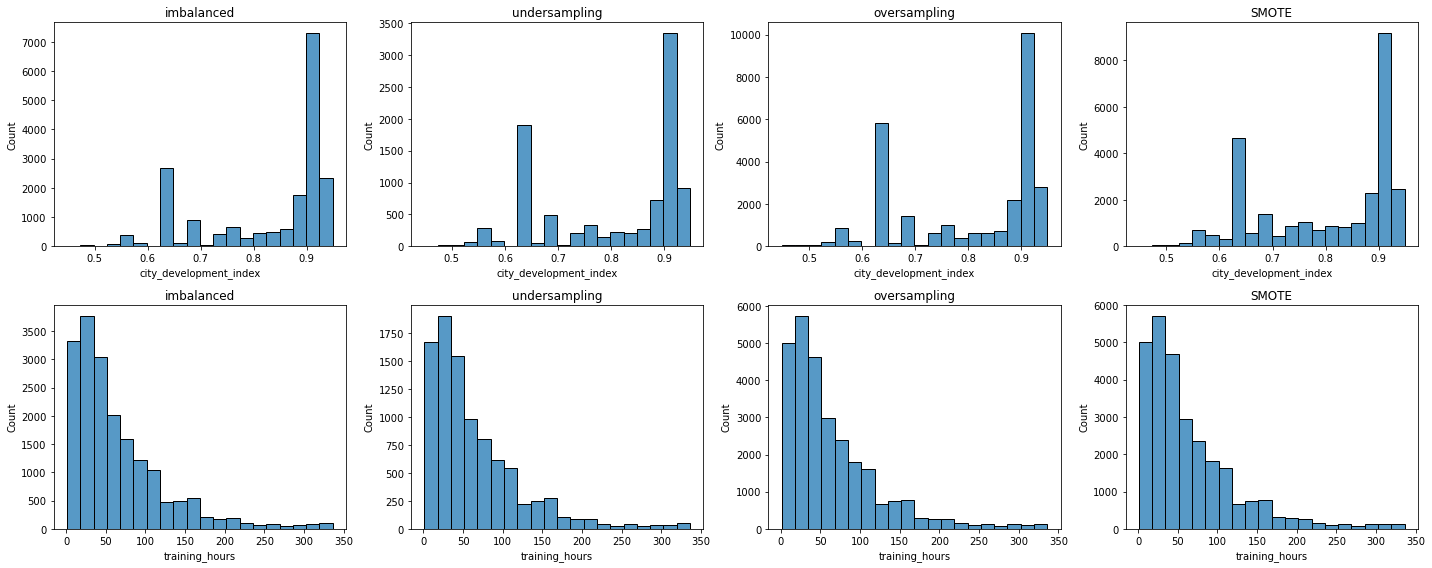

In [37]:
fig, axs = plt.subplots(2, 4, figsize=(20, 8))

numeric_features = ['city_development_index', 'training_hours']
bins = 20
for i, fname in enumerate(numeric_features):
    
    sns.histplot(X_hr_fill[fname], ax=axs[i][0], bins=bins)
    sns.histplot(X_hr_under[fname], ax=axs[i][1], bins=bins)
    sns.histplot(X_hr_over[fname], ax=axs[i][2], bins=bins)
    sns.histplot(X_hr_SMOTE[fname], ax=axs[i][3], bins=bins)

titles = ['imbalanced', 'undersampling', 'oversampling', 'SMOTE']
for ax in axs:
    for i, a in enumerate(ax):
        a.set_title(titles[i])
fig.tight_layout()

* Числовые признаки не изменились.

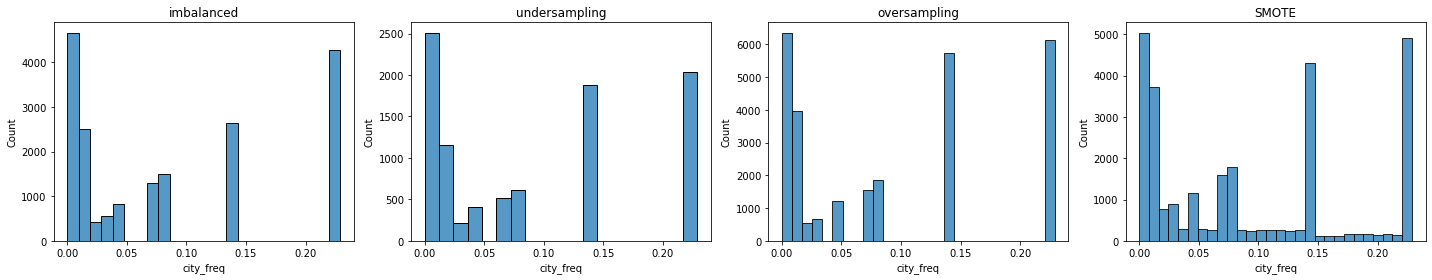

In [38]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

fname = 'city_freq'
sns.histplot(X_hr_encode[fname], ax=axs[0])
sns.histplot(X_hr_under[fname], ax=axs[1])
sns.histplot(X_hr_over[fname], ax=axs[2])
sns.histplot(X_hr_SMOTE[fname], ax=axs[3])

titles = ['imbalanced', 'undersampling', 'oversampling', 'SMOTE']
for i, ax in enumerate(axs):
    ax.set_title(titles[i])
    
fig.tight_layout()

* SMOTE добавил новых городов, остальные не повлияли.

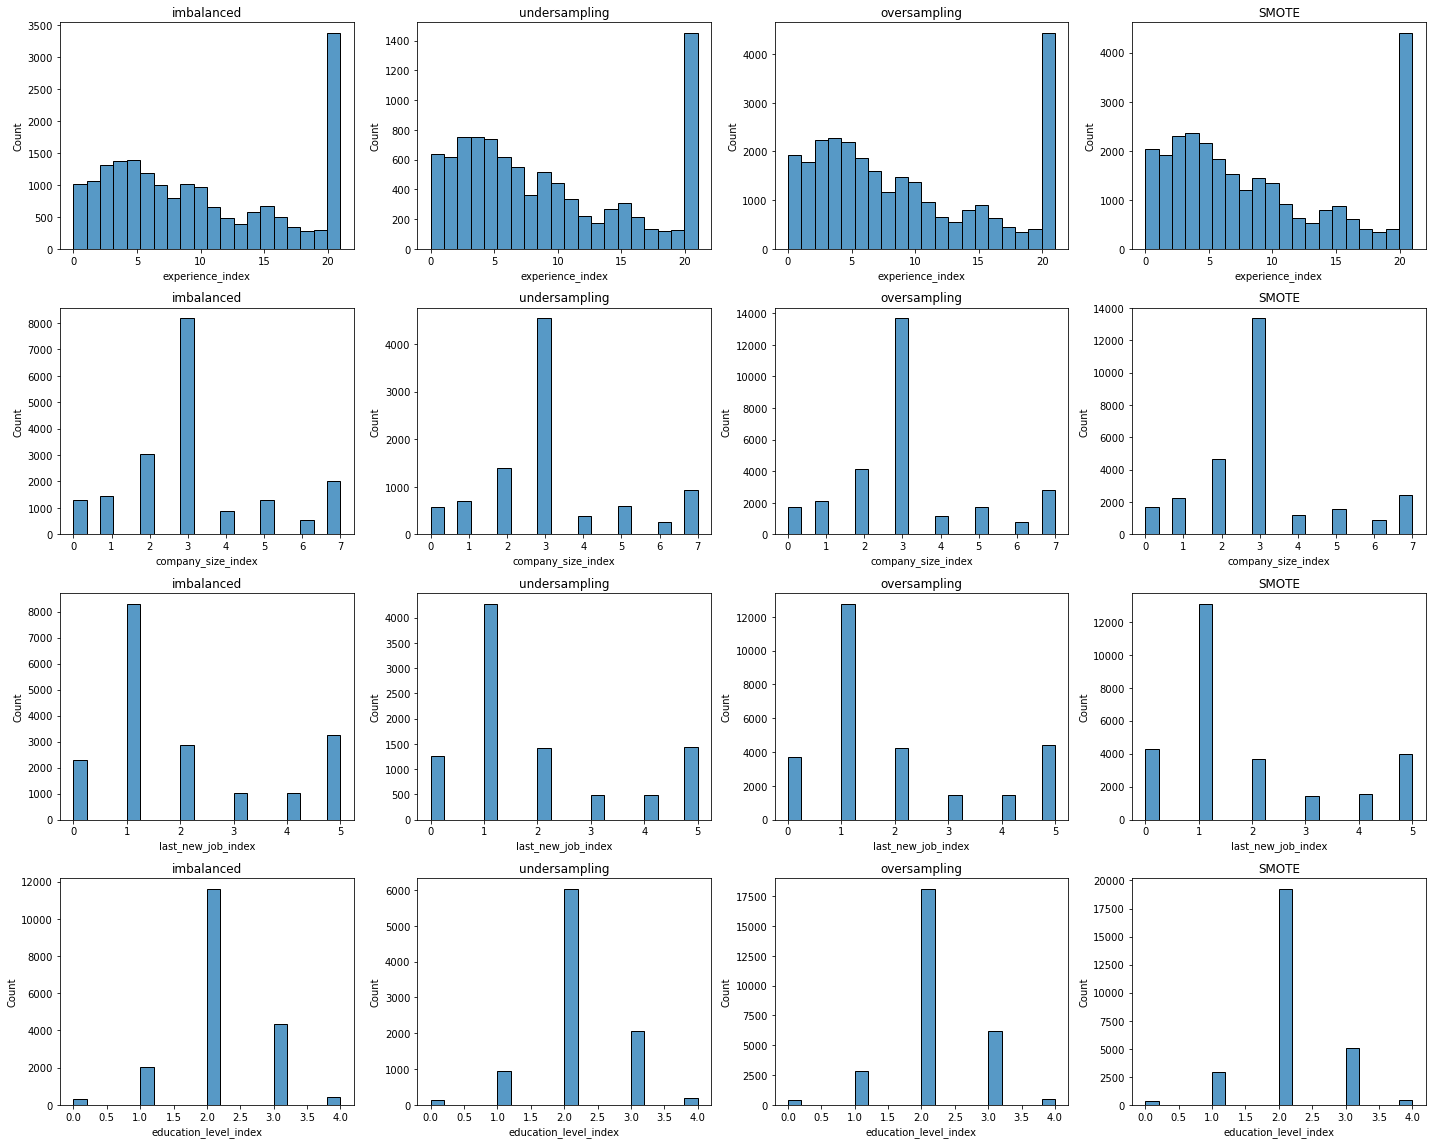

In [39]:
label_encoding = [ 'experience', 'company_size', 'last_new_job', 'education_level', ]

fig, axs = plt.subplots(4, 4, figsize=(20, 16))
bins = 20

for i, f in enumerate(label_encoding):
    fname = f + '_index'
    sns.histplot(X_hr_encode[fname], ax=axs[i][0], bins=bins)
    sns.histplot(X_hr_under[fname], ax=axs[i][1], bins=bins)
    sns.histplot(X_hr_over[fname], ax=axs[i][2], bins=bins)
    sns.histplot(X_hr_SMOTE[fname], ax=axs[i][3], bins=bins)
    
for ax in axs:
    for i, a in enumerate(ax):
        a.set_title(titles[i])
        
fig.tight_layout()

* Заметных отличий между различными методами балансирования не наблюдается (есть небольшие, вроде того, что в education_level у SMOTE меньше доля людей с степенью Masters).

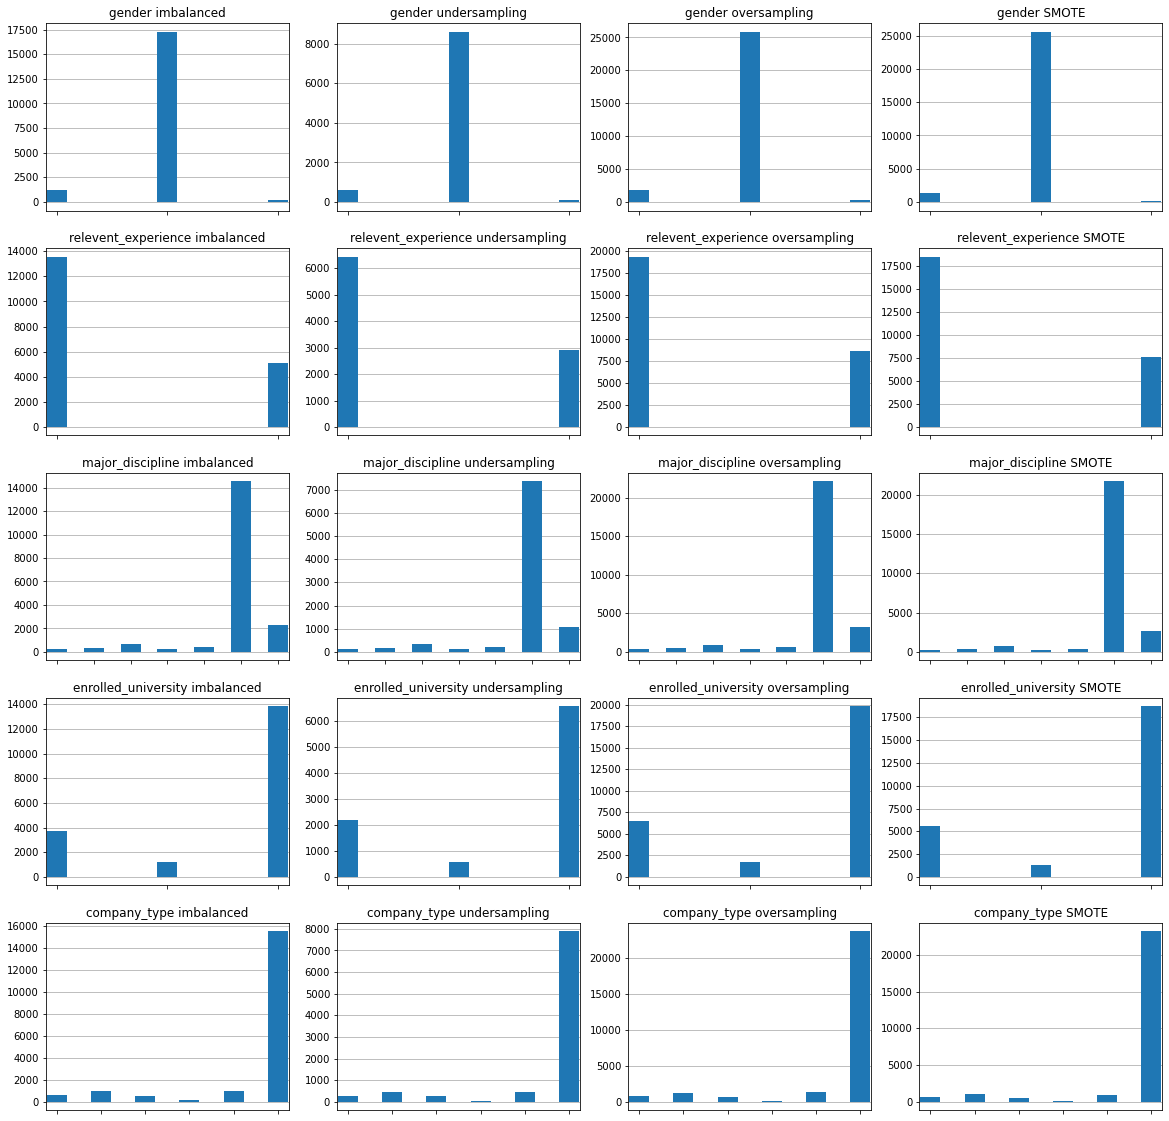

In [42]:
tmp = X_hr_encode.copy()

one_hot = ['gender', 'relevent_experience', 'major_discipline', 'enrolled_university', 'company_type']
# one_hot = ['gender']
fig, axs = plt.subplots(len(one_hot), 4, figsize=(20, 4 * len(one_hot)))

datasets = [X_hr_encode, X_hr_under, X_hr_over, X_hr_SMOTE]

for i, fname in enumerate(one_hot):
    cols = [col for col in tmp.columns if col.startswith(fname)]
    
    for j, ds in enumerate(datasets):
        smokers_hist = ds[cols].sum()
        axs[i][j].vlines(smokers_hist.index, [0] * smokers_hist.shape[0], smokers_hist, linewidth=20)
        axs[i][j].set_xticklabels([])
        axs[i][j].set_title(fname + ' ' + titles[j])
        axs[i][j].yaxis.grid()

* Видно, что для данных признаков все методы балансирования не изменяют распределение.